In [27]:
from SimulationHelper import *
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt 
%matplotlib inline 

In [10]:
######################################################################
############################# Parameters #############################
######################################################################
N = 100
phi = 0.20
max_n_avg = 36
increment = 0.25
num_simulations = 50

n_avg = np.arange(1, max_n_avg, increment)
p = [avg/(N-1) for avg in n_avg]
n = len(p)

### Loading Data

In [27]:
file_dir = "./Results"
file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
file_path = os.path.join(file_dir, file_name)
PC = np.load(file_path)

In [28]:
file_name = "RG_N{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
ML = np.load(file_path)

### Processing Data

In [29]:
#tmp = np.array(results[0])
tmp = ML
dims = (num_simulations, n)
names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)

In [30]:
# Number of Nodes of Network Influenced
S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

# Proportion of Network Influenced
N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]

# Averaged Time of Influenced Nodes
T_05, T_10, T_15, T_20 =  np.apply_along_axis(np.mean, 0, t_05), np.apply_along_axis(np.mean, 0, t_10), np.apply_along_axis(np.mean, 0, t_15), np.apply_along_axis(np.mean, 0, t_20)
T_010, T_015, T_020, T_n, T_95 = np.apply_along_axis(np.mean, 0, t_010), np.apply_along_axis(np.mean, 0, t_015), np.apply_along_axis(np.mean, 0, t_020), np.apply_along_axis(np.mean, 0, t_n), np.apply_along_axis(np.mean, 0, t_95)

In [31]:
#tmp = np.array(results[0])
tmp = PC
dims = (num_simulations, n)
names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

s2_05, s2_10, s2_15, s2_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
s2_010, s2_015, s2_020, s2_n, s2_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

t2_05, t2_10, t2_15, t2_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
t2_010, t2_015, t2_020, t2_n, t2_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)

In [32]:
# Number of Nodes of Network Influenced
S2_05, S2_10, S2_15, S2_20 =  np.apply_along_axis(np.mean, 0, s2_05), np.apply_along_axis(np.mean, 0, s2_10), np.apply_along_axis(np.mean, 0, s2_15), np.apply_along_axis(np.mean, 0, s2_20)
S2_010, S2_015, S2_020, S2_n, S2_95 = np.apply_along_axis(np.mean, 0, s2_010), np.apply_along_axis(np.mean, 0, s2_015), np.apply_along_axis(np.mean, 0, s2_020), np.apply_along_axis(np.mean, 0, s2_n), np.apply_along_axis(np.mean, 0, s2_95)

# Proportion of Network Influenced
N2_05, N2_10, N2_15, N2_20 =  [x/N for x in S2_05], [x/N for x in S2_10], [x/N for x in S2_15], [x/N for x in S2_20]
N2_010, N2_015, N2_020, N2_n, N2_95 = [x/N for x in S2_010], [x/N for x in S2_015], [x/N for x in S2_020], [x/N for x in S2_n], [x/N for x in S2_95]

# Averaged Time of Influenced Nodes
T2_05, T2_10, T2_15, T2_20 =  np.apply_along_axis(np.mean, 0, t2_05), np.apply_along_axis(np.mean, 0, t2_10), np.apply_along_axis(np.mean, 0, t2_15), np.apply_along_axis(np.mean, 0, t2_20)
T2_010, T2_015, T2_020, T2_n, T_95 = np.apply_along_axis(np.mean, 0, t2_010), np.apply_along_axis(np.mean, 0, t2_015), np.apply_along_axis(np.mean, 0, t2_020), np.apply_along_axis(np.mean, 0, t2_n), np.apply_along_axis(np.mean, 0, t2_95)

In [17]:
def plotter_percent(x1,x2, names):
    plt.plot(n_avg, x1)
    plt.plot(n_avg, x2)
    plt.ylabel("Average Number Influenced")
    plt.xlabel("Average Degree")
    plt.title("Percentage of Network Influenced")
    plt.legend(names)

In [18]:
def plotter_number(x1,x2, names):    
    plt.plot(n_avg, x1)
    plt.plot(n_avg, x2)
    plt.ylabel("Average Number Influenced")
    plt.xlabel("Average Degree")
    plt.title("Number of Nodes Influenced")
    plt.legend(names)

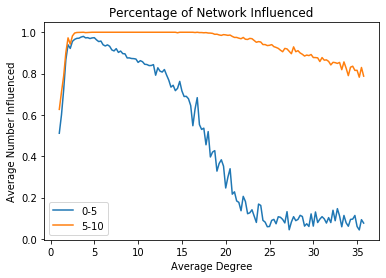

In [40]:
plotter_percent(N_05,N2_10)

## Plotting Function 

In [2]:
def plotter(phi, percentile1, percentile2, names, t = "percent"):
    N = 100
    phi = phi
    max_n_avg = 36
    increment = 0.25
    num_simulations = 50

    n_avg = np.arange(1, max_n_avg, increment)
    p = [avg/(N-1) for avg in n_avg]
    n = len(p)

    file_dir = "./Results"
    file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
    file_path = os.path.join(file_dir, file_name)
    PC = np.load(file_path)
    file_name = "RG_N{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
    ML = np.load(file_path)
    
    #tmp = np.array(results[0])
    tmp = ML
    dims = (num_simulations, n)
    #names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

    s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
    s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

    t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
    t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)
    
    # Number of Nodes of Network Influenced
    S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
    S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

    # Proportion of Network Influenced
    N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
    N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]

    # Averaged Time of Influenced Nodes
    T_05, T_10, T_15, T_20 =  np.apply_along_axis(np.mean, 0, t_05), np.apply_along_axis(np.mean, 0, t_10), np.apply_along_axis(np.mean, 0, t_15), np.apply_along_axis(np.mean, 0, t_20)
    T_010, T_015, T_020, T_n, T_95 = np.apply_along_axis(np.mean, 0, t_010), np.apply_along_axis(np.mean, 0, t_015), np.apply_along_axis(np.mean, 0, t_020), np.apply_along_axis(np.mean, 0, t_n), np.apply_along_axis(np.mean, 0, t_95)
    
    if t == "percent":
        x1 = "N_" + percentile1
        x1 = eval(x1)
        x2 = "N2_" + percentile2
        x2 = eval(x2)
        plotter_percent(x1, x2, names)
    if t == "number":
        x1 = "S_" + percentile1
        x1 = eval(x1)
        x2 = "S2_" + percentile2
        x2 = eval(x2)
        plotter_number(x1, x2, names)

In [82]:
def plotty_plot(phi, percentile, size, typ,names = []):
    N = 100
    phi = phi
    max_n_avg = 36
    increment = 0.25
    num_simulations = 50

    n_avg = np.arange(1, max_n_avg, increment)
    p = [avg/(N-1) for avg in n_avg]
    n = len(p)
    
    file_dir = "./Results"
    file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}size{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment,size)
    file_path = os.path.join(file_dir, file_name)
    tmp = np.load(file_path)
    
    dims = (num_simulations, n)
    #names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

    s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
    s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

    t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
    t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)
    
    # Number of Nodes of Network Influenced
    S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
    S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

    # Proportion of Network Influenced
    N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
    N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]

    if typ == "percent":
        x = "N_" + percentile
        plt.plot(n_avg, eval(x))
    if typ == "number":
        x = "S_" + percentile
        print(eval(x))
        plt.plot(n_avg, eval(x))
        plt.title("Number of Nodes Influenced")
    plt.ylabel("Average Number Influenced")
    plt.xlabel("Average Degree")
    #plt.legend(names)

In [75]:
def plot_all_size(phi,percentile):    
    plotty_plot(phi, percentile,1,"number")
    plotty_plot(phi, percentile,2,"number")
    plotty_plot(phi, percentile,3,"number")
    plotty_plot(phi, percentile,4,"number")
    plotty_plot(phi, percentile,5,"number")
    plt.legend(["1", "2", "3", "4", "5"])
def plot_all_phi(percentile, size):    
    plotty_plot(0.05, percentile,size,"number")
    plotty_plot(0.10, percentile,size,"number")
    plotty_plot(0.20, percentile,size,"number")
    plotty_plot(0.25, percentile,size,"number")
    plotty_plot(0.50, percentile,size,"number")
    plt.legend(["0.05", "0.10", "0.20", "0.25", "0.50"])
def plot_all_percentile(phi,size):
    plotty_plot(phi, "05",size,"number")
    plotty_plot(phi, "10",size,"number")
    plotty_plot(phi, "15",size,"number")
    plotty_plot(phi, "20",size,"number")
    plotty_plot(phi, "n",size,"number")
    plotty_plot(phi, "95",size,"number")
    plt.legend(["0-5", "5-10", "10-15", "15-20", "Normal", "95-100"])

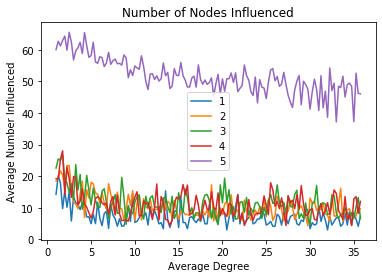

In [64]:
plot_all_size(0.50,"05")

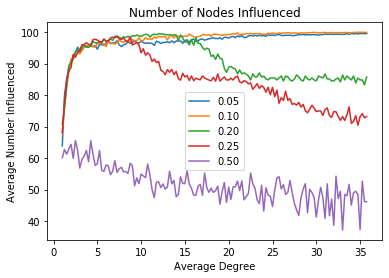

In [65]:
plot_all_phi("05", 5)

[60.1        62.75       61.25       62.98333333 64.36       59.92666667
 65.59666667 62.49       56.82666667 59.68333333 60.68       62.42333333
 58.85333333 65.49333333 61.4        57.66       58.18666667 62.43333333
 56.20333333 55.75666667 57.84       57.57       54.72333333 55.82
 59.21       55.44333333 56.60666667 57.09333333 55.62333333 55.75333333
 55.16       58.4        57.53333333 51.19       53.71666667 51.89666667
 54.91666667 54.32333333 53.83666667 58.13       54.77       50.03333333
 47.46333333 52.36333333 52.44666667 50.64333333 51.78333333 50.16
 50.82333333 55.86       51.82       52.89       47.77333333 48.45666667
 54.07666667 51.95666667 51.86666667 56.01333333 51.79       50.41
 48.23333333 48.27333333 51.08       51.69333333 48.22       55.26
 50.61       49.12       50.47       49.12333333 49.68       51.15333333
 45.36333333 49.33       52.26       45.96666667 50.81333333 46.9
 50.85666667 50.89       52.70666667 49.71       52.75333333 46.76666667
 47.82666

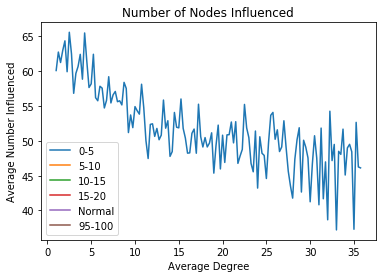

In [112]:
plot_all_percentile(0.18,2)

[40.26533333 39.84533333 39.668      38.348      39.9        40.55333333
 44.196      40.80933333 35.84266667 29.76       34.156      26.708
 32.30533333 23.836      27.064      26.332      34.06933333 32.83066667
 27.30133333 29.98       23.07333333 30.72266667 21.21333333 22.29466667
 30.43733333 33.24933333 23.91733333 22.76133333 24.50133333 18.28666667
 23.12933333 14.58133333 21.052      28.88533333 19.94266667 30.34933333
 14.78133333 24.884      24.96       14.42       22.012      26.572
 18.31466667 27.92933333 18.02666667 18.24266667 16.15333333 19.844
 19.54666667 21.84266667 22.66133333 23.05066667 21.05333333 17.03733333
 22.848      16.35466667 12.97466667 14.77333333 22.59733333 19.23466667
 19.592      16.10533333 16.22933333 15.984      23.79066667 17.28533333
 17.65733333 20.912      19.348      21.73866667 14.648      26.616
 17.40666667 22.968      12.604      20.92933333 18.88266667 24.292
 23.468      21.52666667 21.77733333 19.34266667 16.46133333 18.14933333
 17

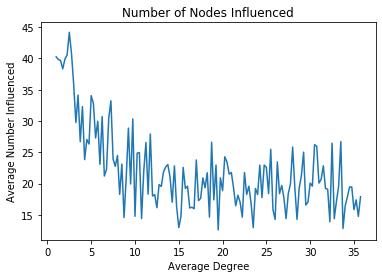

In [110]:
plotty_plot(0.50, "10",2,"number")

In [105]:
N = 100
phi = 0.50
max_n_avg = 36
increment = 0.25
num_simulations = 50
size = 5

n_avg = np.arange(1, max_n_avg, increment)
p = [avg/(N-1) for avg in n_avg]
n = len(p)
    
file_dir = "./Results"
file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}size{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment,size)
file_path = os.path.join(file_dir, file_name)
tmp = np.load(file_path)

dims = (num_simulations, n)
#names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)

# Number of Nodes of Network Influenced
S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

# Proportion of Network Influenced
N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]


In [109]:
s_20

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])